# **Install dan Import Library**

In [ ]:
import nltk
from nltk.stem import WordNetLemmatizer
lemmatizer = WordNetLemmatizer()
import json
import pickle
import pandas as pd
import numpy as np
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout
import random
from keras_preprocessing.text import Tokenizer
from keras_preprocessing.sequence import pad_sequences
from sklearn.preprocessing import LabelEncoder
from keras.layers import Input, Embedding, LSTM, Flatten, GlobalMaxPool1D
from keras.models import Model
from keras.optimizers import RMSprop
import matplotlib.pyplot as plt
from keras.utils.vis_utils import plot_model

#**Download NLTK Package**

In [ ]:
nltk.download('punkt') 
nltk.download('wordnet')
nltk.download('omw-1.4')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


True

#**Download file yang dibutuhkan**

Download dataset json

In [ ]:
!wget -O intents.json https://www.dropbox.com/s/3jiidcrzwi40nbi/bot-fix.json?dl=0

--2022-12-07 09:35:32--  https://www.dropbox.com/s/3jiidcrzwi40nbi/bot-fix.json?dl=0
Resolving www.dropbox.com (www.dropbox.com)... 162.125.81.18, 2620:100:6031:18::a27d:5112
Connecting to www.dropbox.com (www.dropbox.com)|162.125.81.18|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: /s/raw/3jiidcrzwi40nbi/bot-fix.json [following]
--2022-12-07 09:35:33--  https://www.dropbox.com/s/raw/3jiidcrzwi40nbi/bot-fix.json
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://uc4b5fc0773dbcad0112bbb95d17.dl.dropboxusercontent.com/cd/0/inline/ByKAV2vAYYIKWWt54WWUdCr8IjiwZGycfxH9GlcSSOJKUFn6QIL0KL1IR47HZANnwtf1fGywuGgRE5-wbeXI-GUfy9E2nVCWUr2UQzItlVWGS1MhiqjH7VO7MVGby7x88xewx4tIUMGckU8aJ1F30ZjX-VNiDe1Zo2BPVqpCgISMpA/file# [following]
--2022-12-07 09:35:33--  https://uc4b5fc0773dbcad0112bbb95d17.dl.dropboxusercontent.com/cd/0/inline/ByKAV2vAYYIKWWt54WWUdCr8IjiwZGycfxH9GlcSSOJKUFn6QIL0KL1IR47HZANnwtf1fGyw

# **Load Dataset Json**

Tahapan selanjutnya adalah me-load dataset yang telah disediakan. Data yang dipakai dalam proyek ini menggunakan dataset manual yang dibuat oleh anggota kelompok ini. Dataset yang digunakan berupa format **.json** yang sangat cocok untuk membuat model Chatbot. Data Json merupakan data yang termasuk dalam *semi structured* yang dimana data ini menampung beberapa bagian data seperti **tag**, **pattern**, **context**, dan **response**.

In [ ]:
# mengimport dataset yang sudah didownload
data_file=open('/content/intents.json').read()
intents=json.loads(data_file)

#**Convert Json File to Pandas Dataframe**

In [ ]:
# Mendapatkan semua data ke dalam list
tags = [] # data tag
inputs = [] # data input atau pattern
responses = {} # data respon
words=[] # Data kata
classes=[] # Data Kelas atau Tag
documents=[] # Data Kalimat Dokumen
ignore=['?','!',',',"'s"] # Mengabaikan tanda spesial karakter

#**Download file yang dibutuhkan**

Melakukan proses perulangan untuk mendapatkan data dari file.json kedalam setiap variabel list

In [ ]:
for intent in intents['intents']:
  responses[intent['tag']]=intent['responses']
  for lines in intent['patterns']:
    inputs.append(lines)
    tags.append(intent['tag'])
    for pattern in intent['patterns']:
      w = nltk.word_tokenize(pattern)
      words.extend(w)
      documents.append((w, intent['tag']))
      # add to our classes list
      if intent['tag'] not in classes:
        classes.append(intent['tag'])

In [ ]:
# Melakukan konversi data yang sudah diambil ke dalam dataframe
data = pd.DataFrame({"patterns":inputs, "tags":tags})

In [ ]:
data

,patterns,tags
0,hallo,greeting
1,hai,greeting
2,halo,greeting
3,hei,greeting
4,hi,greeting
...,...,...
499,beri saya pantun,pantun
500,bisakah kamu membuat pantun,pantun
501,pantun dong,pantun
502,kasih pantun dong,pantun


In [ ]:
data.tags.unique()

array(['greeting', 'goodbye', 'terimakasih', 'penjelasan_mental_illness',
       'pengidap_mental_illness', 'penyebab_mental_illness',
       'Faktor_penyebab_gangguan_mental', 'Faktor_biologis',
       'Faktor_psikologis', 'gejala_mental_illness_dewasa',
       'gejala_mental_illness_remaja', 'gejala_mental_illness_anak',
       'mental_illness_apakah_bisa_sembuh', 'cara_sembuh',
       'pengobat_mental_illness', 'terapi_mental_illness',
       'obat_mental_illness', 'whatshouldido', 'penyedia_layanan',
       'pengobatan_yang_tersedia', 'perawatan',
       'jenis_profesional_kesehatan_mental',
       'menemukan_profesional_kesehatan_mental', 'pengetahuan_perawatan',
       'bantuan_kesehatan_mental', 'pengetahuan_sebelum_pengobatan_baru',
       'respon_obat', 'jenis_perawatan_kesehatan_mental',
       'tempat_pendukung_kesehatan_mental', 'rawat_inap',
       'kondisi_krisis', 'layanan_lokal', 'psikiatri', 'kesehatan_mental',
       'dukungan', 'pencegahan_masalah_kesehatan_mental',


In [ ]:
data.describe()

,patterns,tags
count,504,504
unique,500,137
top,kamu menjengkelkan,greeting
freq,2,15


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 504 entries, 0 to 503
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   patterns  504 non-null    object
 1   tags      504 non-null    object
dtypes: object(2)
memory usage: 8.0+ KB


In [ ]:
data.isnull().sum()

patterns    0
tags        0
dtype: int64

Setelah data tersebut berhasil dikonversi ke dalam sebuah dataframe, maka lankah selanjutnya adalah melakukan **preprocessing data**. 

# **Preprocessing The Data**

Setelah kita meload data dan mengonversi data json menjadi dataframe. Tahapan selanjutnya adalah praproses pada dataset yang kita gunakan saat ini yaitu dengan cara:

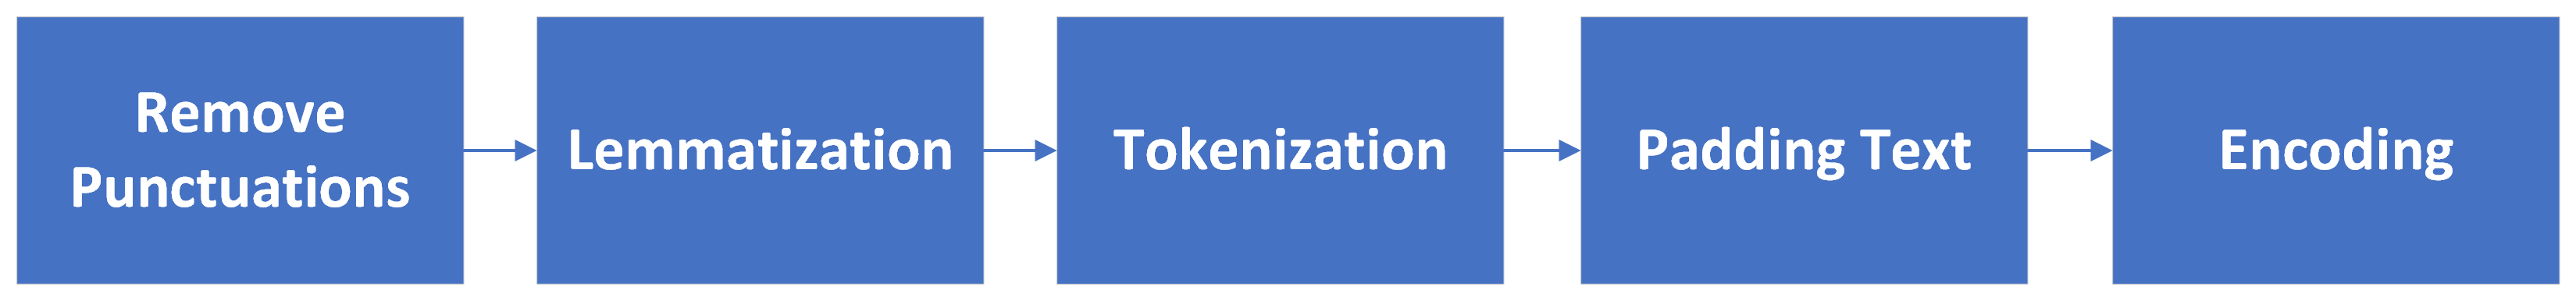

1.   Remove Punctuations (Menghapus Punktuasi)
2.   Lematization (Lematisasi)
3.   Tokenization (Tokenisasi)
4.   Apply Padding (Padding)
5.   Encoding the Outputs (Konversi Keluaran Enkoding)

Kelima tahapan pemrosesan teks ini dijelaskan pada bagian langkah selanjutnya.

## **Remove Punctuations**

Tahapan praproses pada data teks yang pertama adalah menghapus punktuasi atau tanda baca seperti *special character* yaitu **'!'** (**tanda seru**) **','** (**tanda koma**) **'.'** (**tanda titik sebagai berhenti**) '**?**' (**tanda tanya**) dan tanda baca yang lain. Tahapan ini gunanya untuk mempermudah pemrosesan data teks yang akan kita olah.

In [ ]:
import string
data['patterns'] = data['patterns'].apply(lambda wrd:[ltrs.lower() for ltrs in wrd if ltrs not in string.punctuation])
data['patterns'] = data['patterns'].apply(lambda wrd: ''.join(wrd))
data

,patterns,tags
0,hallo,greeting
1,hai,greeting
2,halo,greeting
3,hei,greeting
4,hi,greeting
...,...,...
499,beri saya pantun,pantun
500,bisakah kamu membuat pantun,pantun
501,pantun dong,pantun
502,kasih pantun dong,pantun


## **Lemmatization (Lematisasi)**

Setelah menghapus punktuasi atau tanda baca, tahapan selanjutnya yaitu Lematisasi atau Lemmatization. **Apa itu Lematisasi?**

Lematisasi atau Lemmatization adalah proses dimana merujuk pada melakukan sesuatu menggunakan vocabulary atau kosakata dan analisis morfologi kata-kata untuk menghilangkan *inflectional endings only* dan untuk mengembalikan bentuk *dictionary* (kata dalam kamus) dari sebuah kata yang dikenal sebagai ***lemma***. 

Contoh Lematisasi : **Menggunakan** (Kata Imbuhan) -> **Guna** (Kata Dasar) 

Dalam contoh berikut proses lematisasi awalnya data teks menggunakan kata imbuhan yaitu **Menggunakan** dimana **meng-** + **guna** (kata dasar yang berawalan vokal g) + **kan** (sebagai akhiran) diubah menjadi kata dasar yaitu '**Guna**'. 

Proses ini dimana menghilangkan Prefiks pada imbuhan (**Meng-**) dan Suffiks pada (**-kan**).

In [ ]:
words=[lemmatizer.lemmatize(word.lower()) for word in words if word not in ignore]
words=sorted(list(set(words)))

print (len(words), "unique lemmatized words", words)

521 unique lemmatized words ['(', ')', '.', '[', ']', 'ada', 'adalah', 'afternoon', 'agama', 'agar', 'akan', 'akibat', 'aku', 'alami', 'alasan', 'alkohol', 'ambang', 'anak', 'anak-anak', 'anda', 'aneh', 'antara', 'antidepresan', 'antisosial', 'apa', 'apakah', 'arti', 'artinya', 'asal', 'aspd', 'assalamualaikum', 'atau', 'awal', 'bagaimana', 'bagian', 'bagimana', 'bahagia', 'bahwa', 'bai', 'baik', 'banget', 'bantu', 'bantuan', 'bantuanmu', 'banyak', 'baru', 'bayar', 'bebahaya', 'bekerja', 'belajar', 'benar', 'benar-benar', 'bener', 'berada', 'berapa', 'berarti', 'berasal', 'berbagi', 'berbiaya', 'berbicara', 'berguna', 'berhenti', 'beri', 'berkualitas', 'berlebihan', 'berobat', 'berpelukan', 'berpikir', 'bersenang-senang', 'berteman', 'bertemu', 'betapa', 'biasa', 'bicara', 'bimbang', 'bimbingan', 'binge-eating', 'biologis', 'bisa', 'bisakah', 'boleh', 'bolehkah', 'borderline', 'bosan', 'bosmu', 'bpd', 'bpjs', 'bro', 'buat', 'bukti', 'bunuh', 'buruk', 'butuh', 'bye', 'byee', 'cannabidio

### **Menyortir Data Kelas Tags**

In [ ]:
# sort classes
classes = sorted(list(set(classes)))
print (len(classes), "classes", classes)

137 classes ['ASPD', 'Cannabidiol', 'Delusi', 'Faktor_biologis', 'Faktor_penyebab_gangguan_mental', 'Faktor_psikologis', 'Hubungan_dengan_oranglain', 'Kepribadian_ganda', 'acquaintance', 'age', 'alkohol', 'annoying', 'antidepresan', 'apa_yang_harus_dilakukan', 'bad', 'bantuan_kesehatan_mental', 'beautiful', 'beclever', 'bestfriend', 'birthday', 'bjs', 'boring', 'borkenheart', 'boss', 'boy/girl.friend', 'bpd', 'bunuh_diri', 'busy', 'canyouhelp', 'cara_sembuh', 'cbt_dbt', 'cedera_otak', 'chatbot', 'clever', 'crazy', 'depresi', 'diagnosis_salah', 'dokter', 'dukungan', 'fire', 'funny', 'gangguan_makan_berlebihan', 'gangguan_siklotimik', 'gejala_mental_illness_anak', 'gejala_mental_illness_dewasa', 'gejala_mental_illness_remaja', 'gejala_skizofrenia', 'giveup', 'good', 'goodbye', 'greeting', 'halusinasi', 'happy', 'hobby', 'holdon', 'howareyou', 'hug', 'hungry', 'idontcare', 'informasi_kesehatan', 'islam', 'jenis_perawatan_kesehatan_mental', 'jenis_profesional_kesehatan_mental', 'kecemasan'

### **Mencari Jumlah Keseluruhan Data Teks**

In [ ]:
# documents = combination between patterns and intents
print (len(documents), "documents")

2440 documents


## **Tokenization (Tokenisasi)**

Setelah proses lematisasi dan mencari tahu data classes dan jumlah keseluruhan data patterns dengan intents-nya. Maka, tahapan selanjutnya proses tokenisasi. **Apa itu Tokenisasi?**

Tokenisasi adalah suatu proses memberikan urutan karakter dan sebuah unit dokumen terdefinisi. Tokenisasi juga merupakan tugas untuk memecah kalimat menjadi bagian-bagian yang disebut dengan '**Token**' dan menghilangkan bagian tertentu seperti tanda baca.

Contohnya: **Aku Pergi Ke Makassar** -> '**Aku**' '**Pergi**' '**Ke**' '**Makassar**'

In [ ]:
# Tokenize the data (Tokenisasi Data)
tokenizer = Tokenizer(num_words=2500)
tokenizer.fit_on_texts(data['patterns'])
train = tokenizer.texts_to_sequences(data['patterns'])
train

[[257],
 [258],
 [259],
 [260],
 [261],
 [262],
 [170],
 [171],
 [172],
 [263],
 [264],
 [173],
 [265],
 [266],
 [267],
 [268],
 [269],
 [174],
 [270],
 [175, 174],
 [99, 271],
 [272, 273],
 [274],
 [275, 176],
 [276],
 [277, 176],
 [177, 123],
 [278],
 [177, 123, 62],
 [2, 279, 35, 11, 3],
 [2, 7, 11, 3],
 [2, 7, 3, 52],
 [3, 52, 40],
 [11, 3, 40],
 [124, 3, 52],
 [280, 3, 52],
 [281, 25, 3, 52],
 [45, 5, 14, 63, 11, 3],
 [45, 5, 14, 63, 3, 52],
 [8, 1, 125, 11, 3],
 [8, 1, 125, 9, 3],
 [2, 53, 3, 52],
 [2, 5, 178, 36, 63, 11, 3],
 [2, 53, 11, 3],
 [282, 11, 3, 13, 283],
 [69, 53, 9, 3],
 [69, 5, 284, 285, 9, 3],
 [2, 69, 179, 53, 11, 3],
 [69, 179],
 [2, 69, 126, 53, 11, 3],
 [69, 126],
 [2, 41, 180, 63, 11, 3],
 [2, 37, 63, 11, 3],
 [37, 11, 3],
 [37, 11, 3, 70, 46, 181],
 [180, 11, 3],
 [37, 3, 52],
 [37, 11, 3, 70, 100],
 [37, 286, 11, 3],
 [37, 11, 3, 70, 54],
 [8, 287, 9, 27, 13, 101],
 [101, 64, 11, 3],
 [47, 288, 11, 3],
 [47, 101, 64, 11, 3],
 [31, 11, 3],
 [31, 9, 27],
 [87,

### **Menginisialisasi Data Training**

In [ ]:
# initializing training data
training = []
output_empty = [0] * len(classes)
for doc in documents:

    bag = []

    pattern_words = doc[0]
    pattern_words = [lemmatizer.lemmatize(word.lower()) for word in pattern_words]

    for w in words:
        bag.append(1) if w in pattern_words else bag.append(0)


    output_row = list(output_empty)
    output_row[classes.index(doc[1])] = 1

    training.append([bag, output_row])

random.shuffle(training)
training = np.array(training)


<ipython-input-56-c9c2787d20bd>:21: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  training = np.array(training)


In [ ]:
# membuat train dan test lists. X - patterns, Y - intents
train_x = list(training[:,0])
train_y = list(training[:,1])
print("Training data created")

Training data created


## **Apply Padding**

In [ ]:
# Apply padding 
train_x = pad_sequences(train)

print(train_x) # Padding Sequences

[[  0   0   0 ...   0   0 257]
 [  0   0   0 ...   0   0 258]
 [  0   0   0 ...   0   0 259]
 ...
 [  0   0   0 ...   0  86 256]
 [  0   0   0 ... 123  86 256]
 [  0   0   0 ...   0 515  86]]


Hasil setelah padding adalah setiap sequence memiliki panjang yang sama. Padding dapat melakukan ini dengan menambahkan 0 secara default pada awal sequence yang lebih pendek.

## **Encoding Text**

Setelah tahapan proses Padding pada suatu teks maka proses terakhir dalam pemrosesan teks adalah tahapan Encoding. **Apa itu Encoding?**

Encoding merupakan suatu konversi atau pengkodean yang dimana data kategorik seperti huruf atau data teks menjadi data numerik atau angka menyesuaikan dengan data label yang digunakan. Pada proses tahapan ini, encoding mengubah data teks pada kolom data tags menjadi data numerik dengan bahasa biner komputer yaitu 0 dan 1. 

Tujuan dari encoding ini adalah mempermudah saat proses komputasi data teks dan modelling.

In [ ]:
# Encoding the outputs 
le = LabelEncoder()
train_y = le.fit_transform(data['tags'])
print(train_y) #Label Encodings

[ 50  50  50  50  50  50  50  50  50  50  50  50  50  50  50  49  49  49
  49  49  49  49  49  49 130 130 130 130 130 101 101 101 101 101 101 101
 101  98  98  98  98 104 104 104 104   4   4   3   3   5   5  44  44  44
  44  45  45  45  43  43  78  78  29  29  99  99 129 129 129 129  88  88
 135 135 135 135 135 135 105 105 105 105 105 100 100 100 100 100 106 106
 106 106 106 106 106 106  62  62  62  62  76  76  96  96  15  15  97  97
  97  97  97  97  97  97 120 120 120 120 120 120  61  61  61  61  62  62
 128 128 128 128 115 115 115  71  71  71  74  74  74  74 110 110 110 110
  69  69  69  38  38  38  95  95  95  95  89  89  89  89 103 103 103 103
  65  65 132 132 132   6   6   6  13  13  59  59  59  77  77  67  67  67
  67  37  37 108 108 108 108 111 111  73  73  73  73 123 123 123 123 123
 124 124 136 136 136  72  72  72  72  94  94  94  94  94  20  20 122 122
 109 109 113 113  30  30  30  12  12  36  36  36  70  70  70  31  31  31
  46  46  46  26  26  26  26 102  35  35  63  63  6

Tokenizer pada Tensorflow memberikan token unik untuk setiap kata yang berbeda. Dan juga padding dilakukan untuk mendapatkan semua data dengan panjang yang sama sehingga dapat mengirimkannya ke lapisan atau layer LSTM. variabel target juga dikodekan menjadi nilai desimal.

# **Input Length, Output Length and Vocabulary**

In [ ]:
# input length
input_shape = train_x.shape[1]
print("input length: ", input_shape)

input length:  20


In [ ]:
# define vocabulary
vocabulary = len(tokenizer.word_index)
print("number of unique words : ", vocabulary)

number of unique words :  515


In [ ]:
# output length
output_length = le.classes_.shape[0]
print("output length: ", output_length)

output length:  137


**Input length** dan **output length** terlihat sangat jelas hasilnya. Mereka adalah untuk bentuk input dan bentuk output dari jaringan syaraf pada algoritma Neural Network.

**Vocabulary Size** adalah untuk lapisan penyematan untuk membuat representasi vektor unik untuk setiap kata.

**Input length** dan **output length** terlihat sangat jelas hasilnya. Mereka adalah untuk bentuk input dan bentuk output dari jaringan syaraf pada algoritma Neural Network.

**Vocabulary Size** adalah untuk lapisan penyematan untuk membuat representasi vektor unik untuk setiap kata.

## **Save Model Words & Classes**

Setelah dilakukan pemrosesan teks yang dilakukan lima tahap maka kita bisa simpan model pemrosesan teks tersebut dengan menggunakan format pickle. 

Hal ini biasanya digunakan untuk membuat hubungan model yang telah dilatih dengan model pemrosesan teks. 

In [ ]:
pickle.dump(words, open('/content/words.pkl','wb'))
pickle.dump(classes, open('/content/classes.pkl','wb'))

## **Save Label Encoder & Tokenizer**

In [ ]:
pickle.dump(le, open('/content/le.pkl','wb'))
pickle.dump(tokenizer, open('/content/tokenizers.pkl','wb'))

## **MODEL**

**Menentukan Model Encoder-Decoder**

*   Model akan memiliki layer **Embedding**, **LSTM** dan **Dense**. Konfigurasi dasarnya adalah sebagai berikut:


1.   2 Input Layers  : Satu untuk *encoder_input_data* dan satu lagi untuk *decoder_input_data*.
2.   Embedding layer : Untuk mengonversi *token vectors* untuk memperbaiki sized dense vectors.
3. LSTM layer        : Memberikan akses ke Long-Short Term cells.



In [ ]:
# Creating the model (Membuat Modeling)
i = Input(shape=(input_shape,)) # decoder_inputs
x = Embedding(vocabulary+1,200, mask_zero=True)(i) # Layer Embedding
x = LSTM(200, return_sequences=True)(x) # Layer Long Short Term Memory
x = Flatten()(x) # Layer Flatten
x = Dense(output_length, activation="softmax")(x) # Layer Dense
model  = Model(i,x)

In [ ]:
# Compile the model with Adam from keras Optimizer and sparse_categorical_crossentropy
model.compile(loss="sparse_categorical_crossentropy", optimizer='adam', metrics=['accuracy'])


**Long-Short Term Memory ( LSTM )**

*   Jaringan *Long Short-Term Memory* (LSTM) adalah tipe dari *Recurrent Neural Network* (RNN) yang mampu mempelajari dependency dalam sequence prediction problems.
*   Behavior ini diperlukan dalam domain masalah kompleks seperti, machine translation, speech recognition, dll.
* 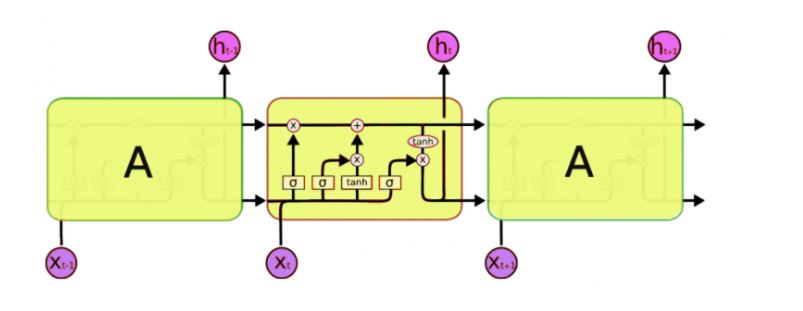

* Jaringan LSTM terdiri dari berbagai memory blocks yang disebut cells (persegi panjang pada gambar).
* ada dua keadaan yang ditransfer ke cell berikutnya; cell state dan hidden state.
*  Memory blocks bertanggung jawab untuk mengingat dan memanipulasi yang dilakukan dengan tiga mekanisme utama yang disebut Gates.
* Penjelasan lebih lanjut mengenai LSTM [Colah's Blog](https://colah.github.io/posts/2015-08-Understanding-LSTMs/)

In [ ]:
model.summary() # Menampilkan Parameter Model

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 20)]              0         
                                                                 
 embedding_1 (Embedding)     (None, 20, 200)           103200    
                                                                 
 lstm_1 (LSTM)               (None, 20, 200)           320800    
                                                                 
 flatten_1 (Flatten)         (None, 4000)              0         
                                                                 
 dense_1 (Dense)             (None, 137)               548137    
                                                                 
Total params: 972,137
Trainable params: 972,137
Non-trainable params: 0
_________________________________________________________________


**Training the Model**

Kami melatih model untuk 200 epochs dengan Adam optimizer dan sparse_categorical_crossentropy loss function dengan mengukur tingkat akurasi menggunakan accuracy metrics.



In [68]:
# Training the model (Latih Model Data)
train = model.fit(np.array(train_x), np.array(train_y), epochs=200, batch_size=5, verbose=1)

Epoch 1/200
101/101 [==============================] - 9s 52ms/step - loss: 4.8784 - accuracy: 0.0417
Epoch 2/200
101/101 [==============================] - 10s 98ms/step - loss: 4.3137 - accuracy: 0.0893
Epoch 3/200
101/101 [==============================] - 6s 56ms/step - loss: 3.3984 - accuracy: 0.2004
Epoch 4/200
101/101 [==============================] - 6s 64ms/step - loss: 2.3801 - accuracy: 0.4325
Epoch 5/200
101/101 [==============================] - 7s 66ms/step - loss: 1.6365 - accuracy: 0.5992
Epoch 6/200
101/101 [==============================] - 5s 51ms/step - loss: 1.0710 - accuracy: 0.7440
Epoch 7/200
101/101 [==============================] - 5s 50ms/step - loss: 0.7250 - accuracy: 0.8333
Epoch 8/200
101/101 [==============================] - 5s 50ms/step - loss: 0.4864 - accuracy: 0.9008
Epoch 9/200
101/101 [==============================] - 5s 51ms/step - loss: 0.3510 - accuracy: 0.9266
Epoch 10/200
101/101 [==============================] - 5s 51ms/step - loss: 0.23



Model training accuracy = 0.96 yaitu; 96%

**Save Model**

In [72]:
#save model
model.save('lstm_model.h5',train)
print('Model Saved Successfully!')

Model Saved Successfully!


# **Model Analysis**

Setelah menjalankan model fitting. Selanjutnya adalah analisa model untuk melihat hasil akurasi dan arsitektur dari model Neural Network tersebut.

**Loss and Accuracy Graphics**

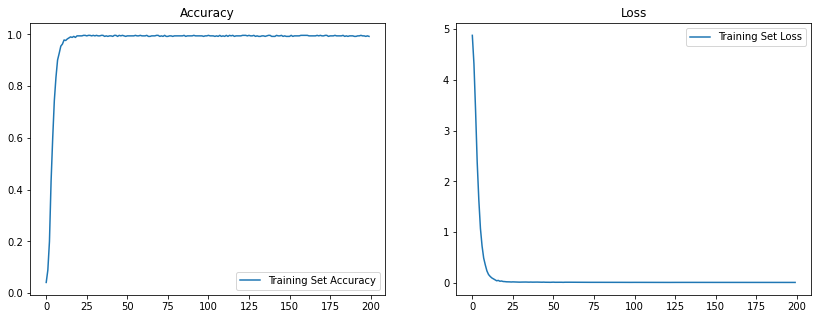

In [70]:
# Plotting model Accuracy and Loss (Visualisasi Plot Hasil Akurasi dan Loss)
# Plot Akurasi
plt.figure(figsize=(14, 5))
plt.subplot(1, 2, 1)
plt.plot(train.history['accuracy'],label='Training Set Accuracy')
plt.legend(loc='lower right')
plt.title('Accuracy')
# Plot Loss
plt.subplot(1, 2, 2)
plt.plot(train.history['loss'],label='Training Set Loss')
plt.legend(loc='upper right')
plt.title('Loss')
plt.show()

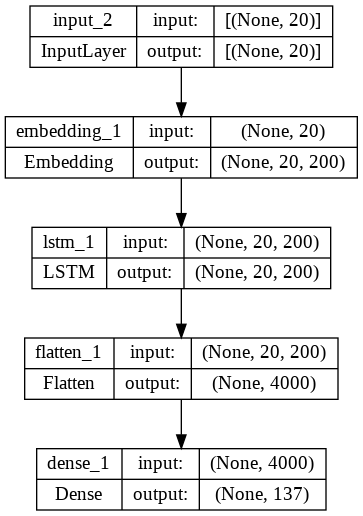

In [71]:
# Visualization Plot Architecture Model (Visualisasi Plot Arsitektur Model)
plot_model(model, to_file='/content/model_plot.png', show_shapes=True, show_layer_names=True)



*   Encoder input hadir di layer Embedding (encoder embedding)
*   Output dari layer Embedding menuju ke cell LSTM yang menghasilkan state vector
* Ini diatur dalam cell LSTM decoder
* Decoder input masuk melalui layer Embedding
* Embedding masuk dalam cell LSTM untuk menghasilkan urutan

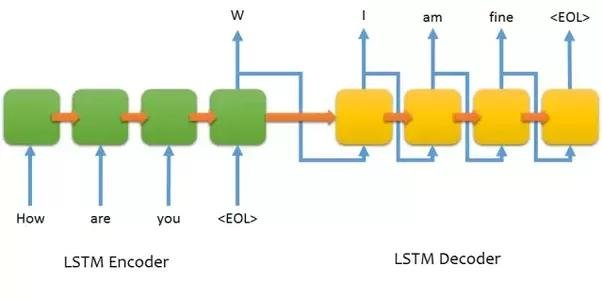